# Alexander Tyan - Exploration write-up

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
data = pd.read_csv("gss2012.csv")

In exploring the data, one of the first patterns I encountered was an odd histogram for the age distribution. While the density function looked quite “normal,” and the general density shape did not seem to be out of the ordinary, setting the histogram bins small enough revealed heaping. I am not sure why this is the case. This heaping does not seem to occur in a manner consistent with classic rounding problems, i.e. only around round age values like “30” or “35.” I explored if this heaping occurs once the dataset is broken down by gender, and the heaping does persist. There are a number of further graphic analysis I do using the age variable and it is worth keeping in mind this issue in further exploration. I wonder if the heaping is an artifact of the sampling process or survey administration methods… It is hard to tell at this point.

Text(0.5,1,'Age Distribution')

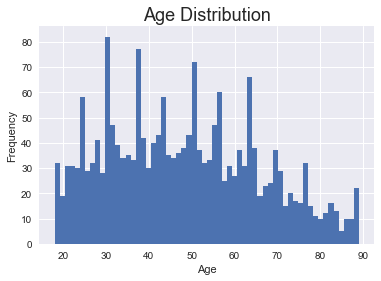

In [99]:
age_df = data[["age"]]
ax = age_df.plot.hist(bins=60, legend=False)
ax.set_xlabel("Age")
ax.set_title("Age Distribution", fontsize=18)

Besides some other general demographic exploration, I looked into gun control issues; in particular, whether a person’s opposition to gun permits may be associated with their demographic characteristics or religious practices. Proportional stacked bar charts did not reveal any systematic relationship between respondent’s income or religious service attendance or educational degree and their disposition to favor/oppose gun permits. This was a little surprising since I expected that some of these variables may be proxy measurements of one’s “conservatism” and that therefore one may hypothesize that they may be associated with respondent’s stance on gun regulation, such as permits. Thus, a further research question could be what other characteristics may be predictive/associated with one’s attitude toward gun permits or gun control more generally. 

One issue during this part of the EDA was that, once the sample is broken down into enough groups, the number of cases in each group can be quite thin. This may have implications for further statistical calculations, as uncertainty may be high in such cases. One may have to find an alternative larger sample to work with (which may be obtained through collection methods and using MRP, as we saw in the readings) or consider bootstrapping methods to address this issue.

Text(0.5,1,'Proportions in Favor/Opposition to Gun Permits, by Education Degree')

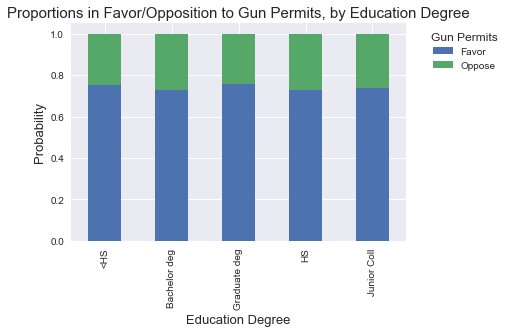

In [109]:
guns_n_education_df = data[["degree", "gunlaw"]]
gunlaw_series = data.groupby(["degree", "gunlaw"]).size()
gunlaw_series_to_percent = gunlaw_series / gunlaw_series.groupby('degree').sum()
ax = gunlaw_series_to_percent.unstack().plot(kind='bar', stacked=True)
ax.set_ylabel("Probability", fontsize=13)
ax.set_xlabel("Education Degree", fontsize=13)
legend = ax.legend(labels=["Favor", "Oppose"], title="Gun Permits", bbox_to_anchor=(1.3, 1))
ax.set_title("Proportions in Favor/Opposition to Gun Permits, by Education Degree", fontsize=15)

Text(0.5,1,'Proportions in Favor/Opposition to Gun Permits, by Religious Service Attendance')

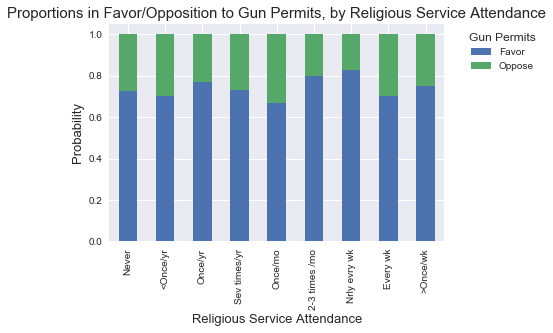

In [110]:
guns_n_rel_attend_df = data[["attend", "gunlaw"]]
relig_attend_series = data.groupby(["attend", "gunlaw"]).size()
relig_attend_to_percent = relig_attend_series / relig_attend_series.groupby('attend').sum()
relig_attend_to_percent_sorted = relig_attend_to_percent.unstack().reindex(index=['Never', '<Once/yr','Once/yr', 'Sev times/yr', 'Once/mo', '2-3 times /mo', 'Nrly evry wk', 'Every wk', '>Once/wk'])
ax = relig_attend_to_percent_sorted.plot(kind='bar', stacked=True)
ax.set_ylabel("Probability", fontsize=13)
ax.set_xlabel("Religious Service Attendance", fontsize=13)
ax.legend(labels=["Favor", "Oppose"], title="Gun Permits", bbox_to_anchor=(1.3, 1))
ax.set_title("Proportions in Favor/Opposition to Gun Permits, by Religious Service Attendance", fontsize=15)

Text(0.5,1,'Proportions in Favor/Opposition to Gun Permits, by Income')

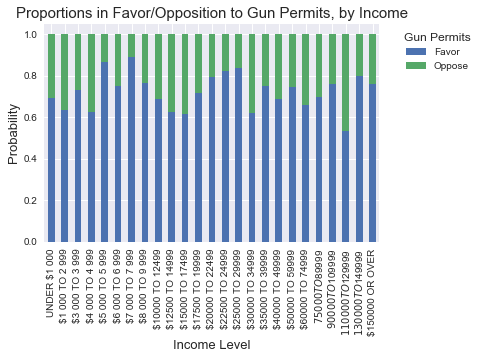

In [111]:
order_income = ['$1 000 TO 2 999', '$10000 TO 12499', '$110000 TO $129999',
       '$12500 TO 14999', '$130000 TO $149999', '$15000 TO 17499',
       '$150000 OR OVER', '$17500 TO 19999', '$20000 TO 22499',
       '$22500 TO 24999', '$25000 TO 29999', '$3 000 TO 3 999',
       '$30000 TO 34999', '$35000 TO 39999', '$4 000 TO 4 999',
       '$40000 TO 49999', '$5 000 TO 5 999', '$50000 TO 59999',
       '$6 000 TO 6 999', '$60000 TO 74999', '$7 000 TO 7 999',
       '$75000 TO $89999', '$8 000 TO 9 999', '$90000 TO $109999',
       'UNDER $1 000']
order_income.sort()
new_list = []
for i in range(len(order_income)):
    clean_string = order_income[i].split()[0].replace("$","")
    try:
        new_list.append((int(clean_string), order_income[i]))
    except ValueError:
        new_list.append((0, order_income[i]))
new_list.sort()
reordered_list = []
for item, string in new_list:
    reordered_list.append(string)
reordered_list

guns_n_income_df = data[["rincom06", "gunlaw"]]
income_guns_series = data.groupby(["rincom06", "gunlaw"]).size()
income_guns_series = income_guns_series / income_guns_series.groupby('rincom06').sum()
ax = income_guns_series.unstack().reindex(index=reordered_list).plot(kind='bar', stacked=True)
ax.set_ylabel("Probability", fontsize=13)
ax.set_xlabel("Income Level", fontsize=13)
ax.legend(labels=["Favor", "Oppose"], title="Gun Permits", bbox_to_anchor=(1.3, 1))
ax.set_title("Proportions in Favor/Opposition to Gun Permits, by Income", fontsize=15)

Text(0.5,1,'Counts in Favor/Opposition to Gun Permits, by Income')

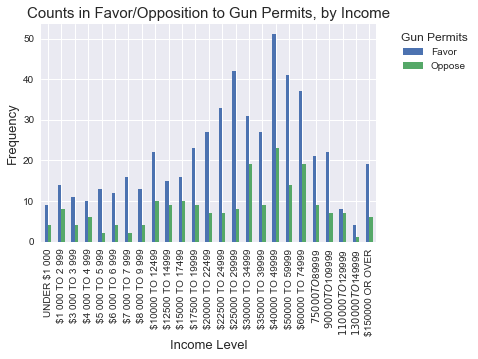

In [117]:
ax = data.groupby(["rincom06", "gunlaw"]).size().unstack().reindex(index=reordered_list).plot.bar()
ax.set_ylabel("Frequency", fontsize=13)
ax.set_xlabel("Income Level", fontsize=13)
ax.legend(labels=["Favor", "Oppose"], title="Gun Permits", bbox_to_anchor=(1.3, 1))
ax.set_title("Counts in Favor/Opposition to Gun Permits, by Income", fontsize=15)

Another issue explored was attitudes toward premarital sex. Breaking down these attitudes into proportions within racial groups did not seem to reveal anything interesting. Nonetheless, similar graphing in regards to religious attendance did. As one may expect, higher religious service attendance is associated with higher unfavorable opinion (“always wrong”) of premarital sex and vice versa. What is more interesting is that this religious exposure does not seem to be associated with “softer” responses, i.e. “sometimes…” and “almost always…”, while the pattern in “harder” response options, i.e. “always…” and “not… at all,” is very obvious. It almost seems that there may be little middle ground for one’s opinion toward premarital sex, with polar opposites dominating sample’s (and population’s) attitudes. Why this may be the case could be a subject of further exploration. So a potential research question may be: why is the attitude on premarital sex so “polarized?” Given that the balance between the two poles seems to shift as one’s (self-reported) religious service attendance increases in frequency, perhaps one could start looking into religious practices as a potential realm of explanation for this phenomenon.

Text(0.5,1,'Proportions in Attitudes to Premarital Sex, by Religious Service Attendance')

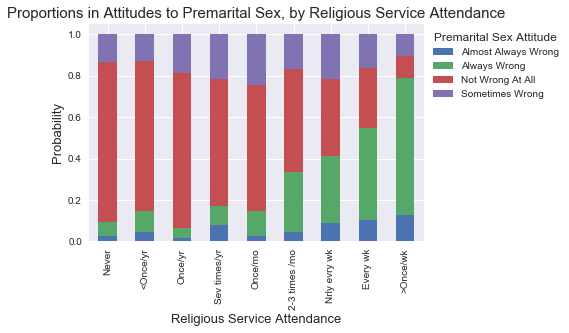

In [118]:
df_premarsx_religattend = data[["attend", "premarsx"]]
df_premarsx_religattend_series = df_premarsx_religattend.groupby(("attend", "premarsx")).size()#.plot.bar()
df_premarsx_religattend_series = df_premarsx_religattend_series / df_premarsx_religattend_series.groupby("attend").sum()
df_premarsx_religattend_series_sorted = df_premarsx_religattend_series.unstack().reindex(index=['Never', '<Once/yr','Once/yr', 'Sev times/yr', 'Once/mo', '2-3 times /mo', 'Nrly evry wk', 'Every wk', '>Once/wk'])
ax = df_premarsx_religattend_series_sorted.plot(kind='bar', stacked=True)
ax.set_ylabel("Probability", fontsize=13)
ax.set_xlabel("Religious Service Attendance", fontsize=13)
ax.legend(labels=["Almost Always Wrong", "Always Wrong", "Not Wrong At All", "Sometimes Wrong"], title="Premarital Sex Attitude", bbox_to_anchor=(1, 1))
ax.set_title("Proportions in Attitudes to Premarital Sex, by Religious Service Attendance", fontsize=15)

Lastly, looking into the issue of hours spent watching TV as related to one’s gender did not reveal any systematic patterns. However, the story seems different once one considers race or income level or general happiness. 

There seems to be a significant difference in the mean number of hours watched per day between “white” and “other” race groups on one hand and the “black” group on the other. Black respondents reported significantly higher TV hours compared to these other groups. In case of the income level, there is also a significant difference between groups, with higher income groups reporting lower TV hours. While this difference may not be statistically significant between any two “neighboring” groups, it seems significant between “far-enough” from each other groups; for instance, between Medium-Low and High income groups. Moreover, a similar trend holds in regards to general happiness. Here, respondents report higher happiness with lower TV hours. This difference seems significant between the “not too happy” and the “very happy” groups. In sum, there seems to be a potential relationship between TV-watching and race, happiness, and income. Thus, a potential research question may be how these three variables may be related to each other, especially in relation to daily lifestyle choices. The results may have implications for socio-economic policies. For instance, one may hypothesize that there may be an underlying employment disparity between race groups that affects many other variables, such as income, TV hours watched and happiness.

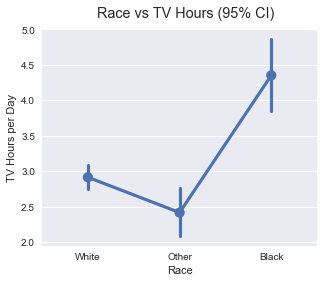

In [166]:
data.rename(columns={"tvhours":"TV Hours per Day", "race": "Race"}, inplace=True)
ax = sns.factorplot(x="Race", y="TV Hours per Day", data=data, ci=95).fig.suptitle('Race vs TV Hours (95% CI)')
plt.subplots_adjust(top=0.9,left=0)

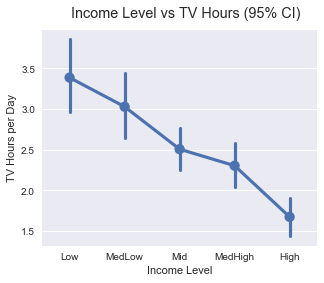

In [167]:
data = pd.read_csv("gss2012.csv")
data.rename(columns={"tvhours":"TV Hours per Day", "rincom06_5": "Income Level"}, inplace=True)
data["Income Level"] = data["Income Level"].astype("category", categories=['Low', 'MedLow', 'Mid', 'MedHigh', 'High'], ordered=True)
sns.factorplot(x="Income Level", y="TV Hours per Day", data=data, ci=95).fig.suptitle('Income Level vs TV Hours (95% CI)')
plt.subplots_adjust(top=0.9,left=0)

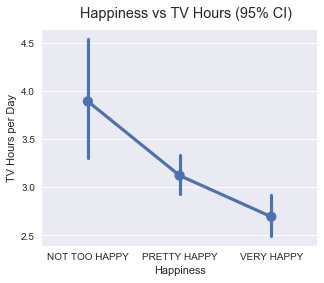

In [168]:
data = pd.read_csv("gss2012.csv")
data.rename(columns={"tvhours":"TV Hours per Day", "happy": "Happiness"}, inplace=True)
data["Happiness"] = data["Happiness"].astype("category", categories=['NOT TOO HAPPY', 'PRETTY HAPPY', 'VERY HAPPY'], ordered=True)
sns.factorplot(x="Happiness", y="TV Hours per Day", data=data, ci=95).fig.suptitle('Happiness vs TV Hours (95% CI)')
plt.subplots_adjust(top=0.9,left=.0)